In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception, ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


# Pre-processing and Feature extraction

TRY DIFFERENT BRIGHTNESS AND CONTRAST WHICH HIGHLIGHTS DIFFERENT ASPECTS REQUIRED TO CLASSIFY DISEASES

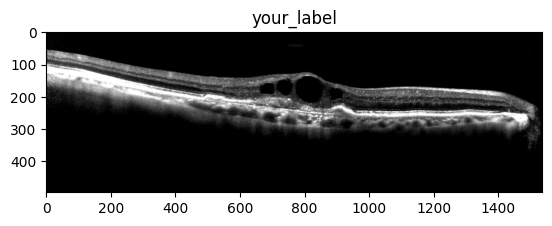

In [39]:


# Load an image
image_path = '/kaggle/input/image-data-eyes/train/train/CNV/CNV-1016042-111.jpeg'
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image)



# contrast
contrast_factor = 2
image = tf.image.adjust_contrast(image, contrast_factor)

#  brightness
brightness_delta = -0.2
image = tf.image.adjust_brightness(image, brightness_delta)

# output
plt.imshow(image.numpy().squeeze(), cmap='gray')
plt.title(label)
plt.show()


CREATE A CUSTOM CONTRAST FUNCTION TO CHANGE CONTRAST OF ALL IMAGES 

LOAD THE IMAGES INTO DATASET 

PERFORM PREPROCESSING OF IMAGES 

In [6]:
# custom contrast function 
def custom_contrast(image):  
    contrast_factor = 2  
    image = tf.image.adjust_contrast(image, contrast_factor)
        
    return image



datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=custom_contrast
)

image_dir = 'train/trn/'
batch_size = 128
target_size = (224, 224)  #  image size
class_mode = 'categorical'  #multiclass

data_generator = datagen.flow_from_directory(
    image_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=True  
)

print(len(data_generator))

Found 6000 images belonging to 4 classes.

47


OBSERVING SAMPLE DATA


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


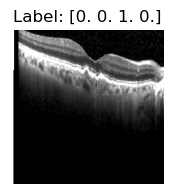

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


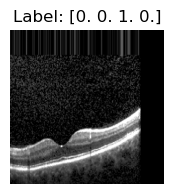

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


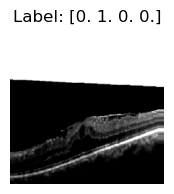

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


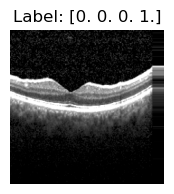

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


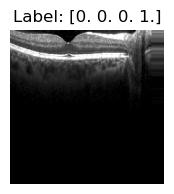

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


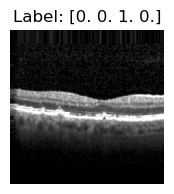

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


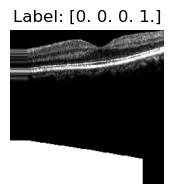

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


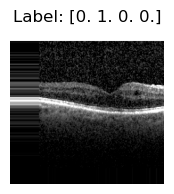

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


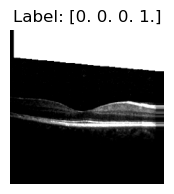

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


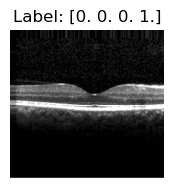

In [7]:
for batch in data_generator:
    images, labels = batch
    for i in range(10):
        plt.figure(figsize=(2, 2))
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()
    break  


CREATE FINAL DATASET FOR THE TRAINING 

CREATE SEPARATE DATASET FOR BOTH TRAINING AND VALIDATION

CREATE BATCHES 

In [40]:
#custom contrast function
def custom_contrast(image):
    
    contrast_factor = 2  # 
    image = tf.image.adjust_contrast(image, contrast_factor)
        
    return image

datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=custom_contrast
)

image_dir_train = '/kaggle/input/image-data-eyes/train/train'
image_dir_validation = '/kaggle/input/image-data-eyes/validation/validation'
batch_size = 32  #batch size

# Training data generator
train_data_generator = datagen.flow_from_directory(
    image_dir_train,
    target_size=(224, 224),  
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=True
)

# Validation data generator
validation_data_generator = datagen.flow_from_directory(
    image_dir_validation,
    target_size=(224, 224),  
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=False  
)


Found 20000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


# CREATING MODELS 

INCEPTION

In [4]:
# inception

base_model_inception = InceptionV3(include_top=False) #base model not including top layers

def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)     # adding a pooling layer 
    x = Dense(128, activation='relu')(x)   # add two more relu layers
    x = Dense(64, activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x) # finally add softmax layer (4) categories
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # using adam 
    return model

model_inception1 = build_model(base_model_inception)



In [9]:
num_epochs = 1  # Set the number of training epochs

history = model_inception1.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)


625/625 [==============================] - 2810s 4s/step - loss: 0.3177 - accuracy: 0.8964 - val_loss: 0.2469 - val_accuracy: 0.9253


In [ ]:
IT GAVE GOOD IN VALIDATION ACCURACY 

 VCG16

In [24]:
#VCG16

from tensorflow.keras.applications import VGG16

base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_vgg2= build_model(base_model_vgg)

In [25]:
num_epochs = 1  # Set the number of training epochs

history = model_vgg2.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)


625/625 [==============================] - 458s 724ms/step - loss: 1.4503 - accuracy: 0.2457 - val_loss: 1.3864 - val_accuracy: 0.2500


IT IS BAD IN BOTH TRAINING AND VALIDATION ACCURACY

Xception

In [30]:
#Xception

from tensorflow.keras.applications import Xception

base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224,3))
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_xcep= build_model(base_model_xception)




83683744/83683744 [==============================] - 0s 0us/step


In [31]:
num_epochs = 1  # Set the number of training epochs

history = model_xcep.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)

625/625 [==============================] - 520s 779ms/step - loss: 0.3543 - accuracy: 0.8827 - val_loss: 0.2597 - val_accuracy: 0.9212


In [88]:
num_epochs = 10  # Set the number of training epochs

history = model_xcep.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)

Epoch 1/10
625/625 [==============================] - 471s 754ms/step - loss: 0.2330 - accuracy: 0.9275 - val_loss: 0.2028 - val_accuracy: 0.9348
Epoch 2/10
625/625 [==============================] - 479s 766ms/step - loss: 0.1976 - accuracy: 0.9347 - val_loss: 0.2444 - val_accuracy: 0.9218
Epoch 3/10
625/625 [==============================] - 475s 759ms/step - loss: 0.1830 - accuracy: 0.9398 - val_loss: 0.2002 - val_accuracy: 0.9402
Epoch 4/10
625/625 [==============================] - 473s 756ms/step - loss: 0.1723 - accuracy: 0.9431 - val_loss: 0.2164 - val_accuracy: 0.9350
Epoch 5/10
625/625 [==============================] - 475s 760ms/step - loss: 0.1700 - accuracy: 0.9442 - val_loss: 0.1979 - val_accuracy: 0.9410
Epoch 6/10
625/625 [==============================] - 472s 755ms/step - loss: 0.1541 - accuracy: 0.9482 - val_loss: 0.1454 - val_accuracy: 0.9503
Epoch 7/10
625/625 [==============================] - 472s 756ms/step - loss: 0.1458 - accuracy: 0.9520 - val_loss: 0.1909 -

In [32]:
model_xcep.save("modelxcep.h5")

IT GAVE GOOD IN VALIDATION ACCURACY 

# TRAINING AND TWEAKING

In [5]:
base_model_inception = InceptionV3(include_top=False)

def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation=LeakyReLU(alpha=0.2))(x) # change activation function 
    x = Dense(64, activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01))(x) # add regulization 
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) 
    return model

model_inception2 = build_model(base_model_inception)



In [6]:
num_epochs = 1  # Set the number of training epochs

history = model_inception2.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)


625/625 [==============================] - 505s 735ms/step - loss: 0.7215 - accuracy: 0.8575 - val_loss: 0.4314 - val_accuracy: 0.8698


In [12]:
base_model_inception = InceptionV3(include_top=False)
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy']) #trying different algorithm 
    return model

model_inception3 = build_model(base_model_inception)



In [21]:
num_epochs = 1  # Set the number of training epochs

history = model_inception3.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)


625/625 [==============================] - 411s 658ms/step - loss: 0.2263 - accuracy: 0.9220 - val_loss: 0.1906 - val_accuracy: 0.9352


In [97]:
num_epochs = 5  # Set the number of training epochs

history = model_inception3.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)


Epoch 1/5
625/625 [==============================] - 412s 659ms/step - loss: 0.1850 - accuracy: 0.9377 - val_loss: 0.1584 - val_accuracy: 0.9480
Epoch 2/5
625/625 [==============================] - 391s 625ms/step - loss: 0.1616 - accuracy: 0.9445 - val_loss: 0.1982 - val_accuracy: 0.9342
Epoch 3/5
625/625 [==============================] - 394s 630ms/step - loss: 0.1458 - accuracy: 0.9510 - val_loss: 0.1545 - val_accuracy: 0.9507
Epoch 4/5
625/625 [==============================] - 392s 627ms/step - loss: 0.1277 - accuracy: 0.9542 - val_loss: 0.1509 - val_accuracy: 0.9500
Epoch 5/5
625/625 [==============================] - 389s 622ms/step - loss: 0.1187 - accuracy: 0.9589 - val_loss: 0.2155 - val_accuracy: 0.9225


In [ ]:
num_epochs = 10  # Set the number of training epochs

history = model_inception3.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)


In [7]:
model_inception2.save("model2.h5")

In [14]:
model_inception3.save("model3.h5")

USING SGD GAVE BETTER RESULTS

In [36]:
base_model_inception = InceptionV3(include_top=False)

def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation=LeakyReLU(alpha=0.2))(x) # change activation function 
    x = Dense(64, activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01))(x) # add regulization 
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy']) # change learning rate 
    return model

model_inception4 = build_model(base_model_inception)

In [37]:
num_epochs = 1  # Set the number of training epochs

history = model_inception4.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)


625/625 [==============================] - 448s 660ms/step - loss: 1.5190 - accuracy: 0.2531 - val_loss: 1.3881 - val_accuracy: 0.2500


INCREASING LEARNING RATE DECREASED PERFORMANCE DRASTICALLY

In [20]:
from tensorflow.keras.applications import VGG16

base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01))(x) #ADDING REGULIZER
    x = Dense(64, activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_vgg= build_model(base_model_vgg)

58889256/58889256 [==============================] - 0s 0us/step


In [22]:
num_epochs = 1  # Set the number of training epochs

history = model_vgg.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)


625/625 [==============================] - 467s 735ms/step - loss: 3.0672 - accuracy: 0.6674 - val_loss: 2.3110 - val_accuracy: 0.8978


In [27]:
model_vgg.save("modelvgg.h5")

ADDING REGULIZER INCREASED PERFOMANCE DRASTICALLY AS VCG PERFORMED BAD IN PREVIOUS PART NOW IT GAVE GOOD VALIDATION ACCURACY

In [34]:
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224,3))
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_xcep2= build_model(base_model_xception)

In [35]:
num_epochs = 1  # Set the number of training epochs

history = model_xcep2.fit(
    train_data_generator,  # Training data generator
    epochs=num_epochs,
    validation_data=validation_data_generator,  # Validation data generator
)

625/625 [==============================] - 516s 780ms/step - loss: 0.5301 - accuracy: 0.8820 - val_loss: 0.5719 - val_accuracy: 0.8560


# MODEL EVALUATION AND PREDICTION 

In [41]:
y_true = validation_data_generator.classes  
print(y_true)

[0 0 0 ... 3 3 3]


In [ ]:
MAKE PREDICTIONS

In [42]:
pred2=model_inception3.predict(validation_data_generator)

125/125 [==============================] - 65s 513ms/step


In [45]:
pred3=model_xcep.predict(validation_data_generator)

125/125 [==============================] - 61s 486ms/step


CLASSWISE RECALL

In [44]:
from sklearn.metrics import recall_score

class_wise_recall = []

y_true = validation_data_generator.classes

y_pred = pred2.argmax(axis=1)

for class_index in range(4):
    class_true = [1 if label == class_index else 0 for label in y_true]
    class_pred = [1 if label == class_index else 0 for label in y_pred]
    recall = recall_score(class_true, class_pred)
    class_wise_recall.append(recall)

print(class_wise_recall)

[0.898, 0.915, 0.941, 0.971]


In [72]:
from sklearn.metrics import recall_score

class_wise_recall = []

# Assuming validation_data_generator.classes returns the true class labels
y_true = validation_data_generator.classes

# Assuming validation_predictions contains the model's predicted probabilities
y_pred = pred3.argmax(axis=1)

# Assuming num_classes is the total number of classes
for class_index in range(4):
    class_true = [1 if label == class_index else 0 for label in y_true]
    class_pred = [1 if label == class_index else 0 for label in y_pred]
    recall = recall_score(class_true, class_pred)
    class_wise_recall.append(recall)

# Print or use class_wise_recall as needed
print(class_wise_recall)

[0.958, 0.927, 0.856, 0.935]


AVERAGE PRECISION AND RECALL

In [51]:
from sklearn.metrics import precision_score, recall_score

pred31 = np.argmax(pred3, axis=1)



precision = precision_score(y_true, pred31, average='macro')
recall = recall_score(y_true, pred31, average='macro')

print(precision,recall)

0.9217344420720632 0.919


In [52]:
from sklearn.metrics import precision_score, recall_score

pred21 = np.argmax(pred2, axis=1)



precision = precision_score(y_true, pred21, average='macro')
recall = recall_score(y_true, pred21, average='macro')

print(precision,recall)


0.933661506476825 0.93125


F1 SCORE

In [74]:
from sklearn.metrics import f1_score

micro_f1 = f1_score(y_true, pred21, average='micro')
print("Micro F1-Score for Validation Set:", micro_f1)


Micro F1-Score for Validation Set: 0.93125


In [75]:
from sklearn.metrics import f1_score

micro_f1 = f1_score(y_true, pred31, average='micro')
print("Micro F1-Score for Validation Set:", micro_f1)


Micro F1-Score for Validation Set: 0.919


BOTH ARE PERFORMING WELL , LETS TRY ENSEMBLE

AVERAGE ENSEMBLE

In [60]:



# Average the predictions from both models
ens_pred = (pred2 + pred3) / 2
ens_pred1= np.argmax(ens_pred, axis=1)
recision = precision_score(y_true, ens_pred1, average='macro')
recall = recall_score(y_true, ens_pred1, average='macro')

print(precision,recall)



0.933661506476825 0.9442499999999999


AVERAGE RECALL IS BETTER WITH ENSEMBLE

In [71]:
y_pred = ens_pred1

class_wise_recall2=[]
# Assuming num_classes is the total number of classes
for class_index in range(4):
    class_true = [1 if label == class_index else 0 for label in y_true]
    class_pred = [1 if label == class_index else 0 for label in y_pred]
    recall = recall_score(class_true, class_pred)
    class_wise_recall2.append(recall)

# Print or use class_wise_recall as needed
print(class_wise_recall2)

[0.944, 0.942, 0.926, 0.965]


CLASSWISE RECALL OF ENSEMBLE

In [76]:
from sklearn.metrics import f1_score

micro_f1 = f1_score(y_true, ens_pred1, average='micro')
print("Micro F1-Score for Validation Set:", micro_f1)


Micro F1-Score for Validation Set: 0.94425


Micro F1-Score got better

CONFUSION MATRIX

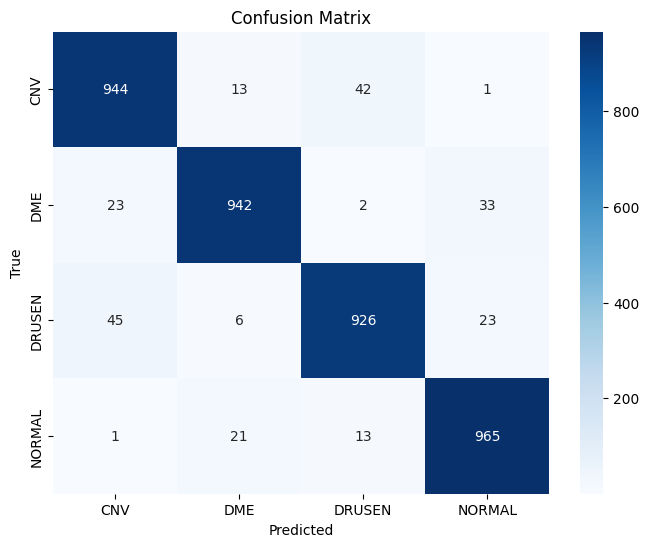

In [82]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class_labels = ["CNV", "DME", "DRUSEN", "NORMAL"]

cm = confusion_matrix(y_true, ens_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
MAKING PREDICTIONS ON TEST DATA

In [98]:
#custom contrast function
def custom_contrast(image):
    
    contrast_factor = 2  # 
    image = tf.image.adjust_contrast(image, contrast_factor)
        
    return image

datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=custom_contrast
)

image_dir_test = '/kaggle/input/image-data-eyes/test'


# Testing data generator
test_data_generator = datagen.flow_from_directory(image_dir_test,target_size=(224, 224))




Found 10000 images belonging to 1 classes.


In [99]:
test2=model_inception3.predict(test_data_generator)

313/313 [==============================] - 207s 661ms/step


In [100]:
test3=model_xcep.predict(test_data_generator)

313/313 [==============================] - 150s 481ms/step


In [101]:

# Average the predictions from both models
ens_test = (test2 + test3) / 2
ens_test1= np.argmax(ens_test, axis=1)

In [102]:
import pandas as pd

# Assuming 'predictions' is a list or NumPy array containing your predicted class labels

# Create a DataFrame with the predicted class labels
df = pd.DataFrame({'Predicted_Labels': ens_test1})

# Save the DataFrame to a CSV file
df.to_csv('predicted_labels.csv', index=False)
